<h1 align = 'center'> Homework 11: Data Competition </h1>
<h3 align = 'center'> By: Josh Jaeger and Max Butler </h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn import metrics
from sklearn import preprocessing

<h3> Data Preprocessing and Feature Reduction </h3>

In [2]:
trainingDF = pd.read_csv(r"../Competition/train_data.csv")

In [3]:
##Determine if the data should be balanced

trainingDF['class'].value_counts()

0    1951
1    1269
Name: class, dtype: int64

In [4]:
train_X = trainingDF.drop(columns=['class'])
train_y = trainingDF['class']

In [5]:
rf = RandomForestClassifier(n_estimators=5, max_features=10,random_state=1984)

In [6]:
rf.fit(train_X,train_y)

RandomForestClassifier(max_features=10, n_estimators=5, random_state=1984)

In [7]:
feature_importances = pd.DataFrame(rf.feature_importances_, 
                                   index = train_X.columns ,
                                   columns = ['importance'])
feature_importances = feature_importances.sort_values('importance'  , ascending=False)

<AxesSubplot:title={'center':'Feature Importance of Spam Email'}>

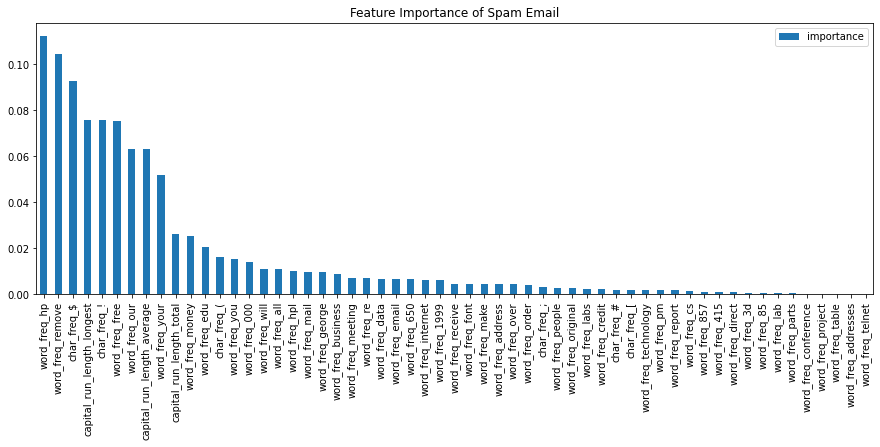

In [8]:
feature_importances.plot(kind = 'bar',figsize=(15,5), title='Feature Importance of Spam Email')

In [9]:
featureThreshold = 0.005

In [10]:
features_to_drop = feature_importances.loc[feature_importances.importance < featureThreshold]

In [11]:
features_to_drop.index

Index(['word_freq_receive', 'word_freq_font', 'word_freq_make',
       'word_freq_address', 'word_freq_over', 'word_freq_order', 'char_freq_;',
       'word_freq_people', 'word_freq_original', 'word_freq_labs',
       'word_freq_credit', 'char_freq_#', 'char_freq_[',
       'word_freq_technology', 'word_freq_pm', 'word_freq_report',
       'word_freq_cs', 'word_freq_857', 'word_freq_415', 'word_freq_direct',
       'word_freq_3d', 'word_freq_85', 'word_freq_lab', 'word_freq_parts',
       'word_freq_conference', 'word_freq_project', 'word_freq_table',
       'word_freq_addresses', 'word_freq_telnet'],
      dtype='object')

In [12]:
reducedTrainingDF = trainingDF.drop(columns = features_to_drop.index)

In [13]:
train_X = reducedTrainingDF.drop(columns = ['class'])
train_y = reducedTrainingDF['class']

In [14]:
testDF = pd.read_csv(r"../Competition/test_data.csv")

In [15]:
reducedTestDF = testDF.drop(columns = features_to_drop.index)

In [16]:
test_X = reducedTestDF.drop(columns = 'class')
test_y = reducedTestDF['class']

In [17]:
type(train_y)

pandas.core.series.Series

<h3> Data Normalization </h3>

In [18]:
scaler = preprocessing.MinMaxScaler().fit(train_X)

In [19]:
train_X_scale = scaler.transform(train_X)
train_X_scale = pd.DataFrame(train_X_scale)
train_X_scale.columns = train_X.columns


In [20]:
test_X_scale = scaler.transform(test_X)
test_X_scale = pd.DataFrame(test_X_scale)
test_X_scale.columns = test_X.columns

<h3> Training Model <h3>

In [21]:
clf1 = RandomForestClassifier(n_estimators = 180, criterion = 'entropy', max_features = 7, bootstrap=True, random_state=1984)

In [22]:
clf2 = MLPClassifier(solver = 'lbfgs', activation = 'identity', max_iter=1500, early_stopping=True, tol =2e-4, random_state=1984)

In [23]:
clf3 = SVC(kernel = 'rbf', gamma = 0.3, C=400, probability=True,random_state=1984)

In [24]:
eclf = VotingClassifier(estimators = [('rf',clf1),('mlp',clf2),('svc',clf3)], voting = 'hard')

In [25]:
eclf.fit(train_X_scale,train_y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features=7,
                                                     n_estimators=180,
                                                     random_state=1984)),
                             ('mlp',
                              MLPClassifier(activation='identity',
                                            early_stopping=True, max_iter=1500,
                                            random_state=1984, solver='lbfgs',
                                            tol=0.0002)),
                             ('svc',
                              SVC(C=400, gamma=0.3, probability=True,
                                  random_state=1984))])

<h3> Test Model Performance </h3>

In [26]:
pred_y = eclf.predict(test_X_scale)

In [27]:
cm = metrics.confusion_matrix(test_y, pred_y)
print(cm)

[[814  23]
 [ 50 494]]


In [28]:
metrics.roc_auc_score(test_y,pred_y)

0.9403045716494484